In [4]:
x = 6
ss = 0.01

for i in range(2000):
    x = x - ss*(2*x)

In [5]:
x

1.6994274752726746e-17

In [6]:
'{0:0.20f}'.format(x)

'0.00000000000000001699'

In [7]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df = df[['price', 'area']]

In [9]:
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


**Scaling**

- x-mean()/std()

In [10]:
df1 = (df-df.mean())/df.std()

In [11]:
df1.head()

,price,area
0,4.562174,1.045766
1,4.000809,1.755397
2,4.000809,2.216196
3,3.982096,1.082630
4,3.551716,1.045766


In [17]:
def gradient(X, y, b1_current = 0, b0_current = 0, iters = 1000, ss = 0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns = ['b0','b1', 'rss'])
    for i in range(iters):
        y_pred = b0_current + b1_current*X
        rss = sum([i**2 for i in (y-y_pred)])/N
        
        b1_slope = -(2/N)*sum((y-y_pred)*X)
        b0_slope = -(2/N)*sum(y-y_pred)
        
        b1_current = b1_current - ss*b1_slope
        b0_current = b0_current - ss*b0_slope
        
        gd_df.loc[i] = [b0_current, b1_current, rss]
    
    return gd_df

In [18]:
import numpy as np
X = np.array(df1['area'])
y = np.array(df1['price'])

In [19]:
a = gradient(X,y)

In [20]:
a.head()

,b0,b1,rss
0,5.117211e-18,0.010700,0.998165
1,2.230224e-17,0.021187,0.986830
2,3.243888e-17,0.031464,0.975943
3,3.045067e-17,0.041536,0.965486
4,2.675943e-17,0.051407,0.955442


In [21]:
a.tail()

,b0,b1,rss
995,2.630312e-16,0.535997,0.711399
996,2.560398e-16,0.535997,0.711399
997,2.557220e-16,0.535997,0.711399
998,2.522997e-16,0.535997,0.711399
999,2.544835e-16,0.535997,0.711399


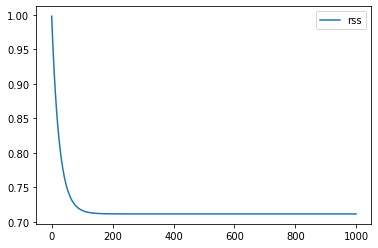

In [23]:
a.plot.line(y = ['rss'])

In [ ]:
LinearRegression(x,y)